# **Ad Click Prediction**


# **Goal of the Project**

Goal of the project is to find the accuracy of Model if a particular user is likely to click on particular ad or not based on his feature.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv(io.StringIO(uploaded['advertising.csv'].decode('utf-8')))

Saving advertising.csv to advertising.csv


In [ ]:
dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## **Are there any duplicate records present?**

In [ ]:
dataframe.duplicated().sum()

0

As the value above is zero, there are no duplicates.

# Attribute Type Classification

## Determing the type of attributes in the given dataset

In [ ]:
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [ ]:
categorical_columns = ['Gender', 'Clicked on Ad' ]

# Exploratory Data Analysis

## What age group does the dataset majorly consist of?

<Figure size 1000x700 with 0 Axes>

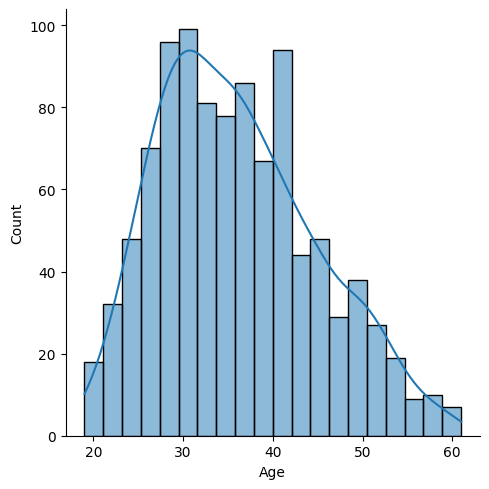

In [ ]:
plt.figure(figsize=(10,7))
sns.displot(data=dataframe, x='Age', bins=20, kde=True, edgecolor="k", linewidth=1)

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [ ]:
print('Age of the oldest person:', dataframe['Age'].max(), 'Years')
print('Age of the youngest person:', dataframe['Age'].min(), 'Years')
print('Average age in dataset:', dataframe['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


## What is the income distribution in different age groups?

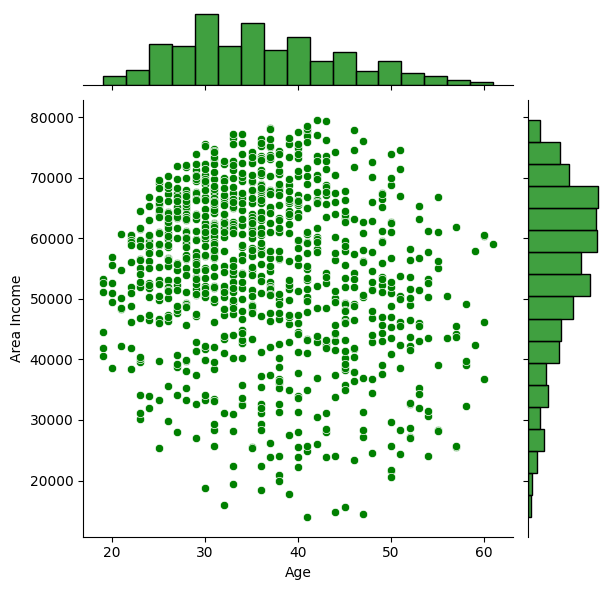

In [ ]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= dataframe)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

## Which age group is spending maximum time on the internet?

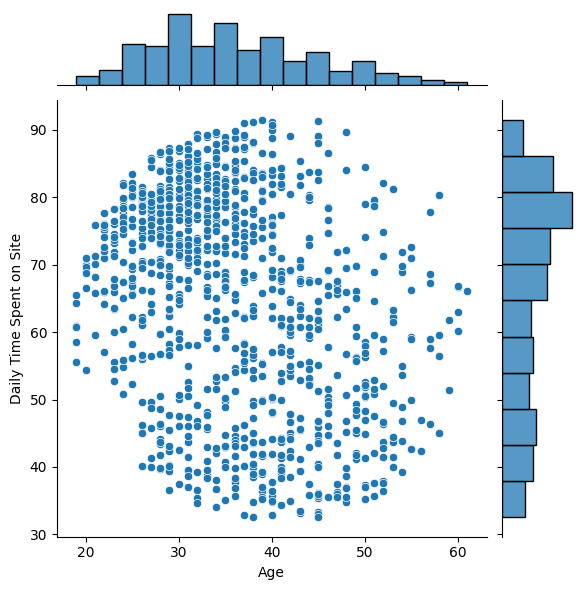

In [ ]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= dataframe)

From the above plot its evident that the age group of 25-40 is most active on the internet.

## Which gender has clicked more on online ads?



In [ ]:
dataframe.groupby(['Gender','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Gender,,
0,250,269
1,250,231


Based on above data we can see that a greater number of females have clicked on ads compared to male.

## **Maximum number of internet users belong to which country in the given dataset?**

In [ ]:
pd.crosstab(index=dataframe['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

# What is the relationship between different features?

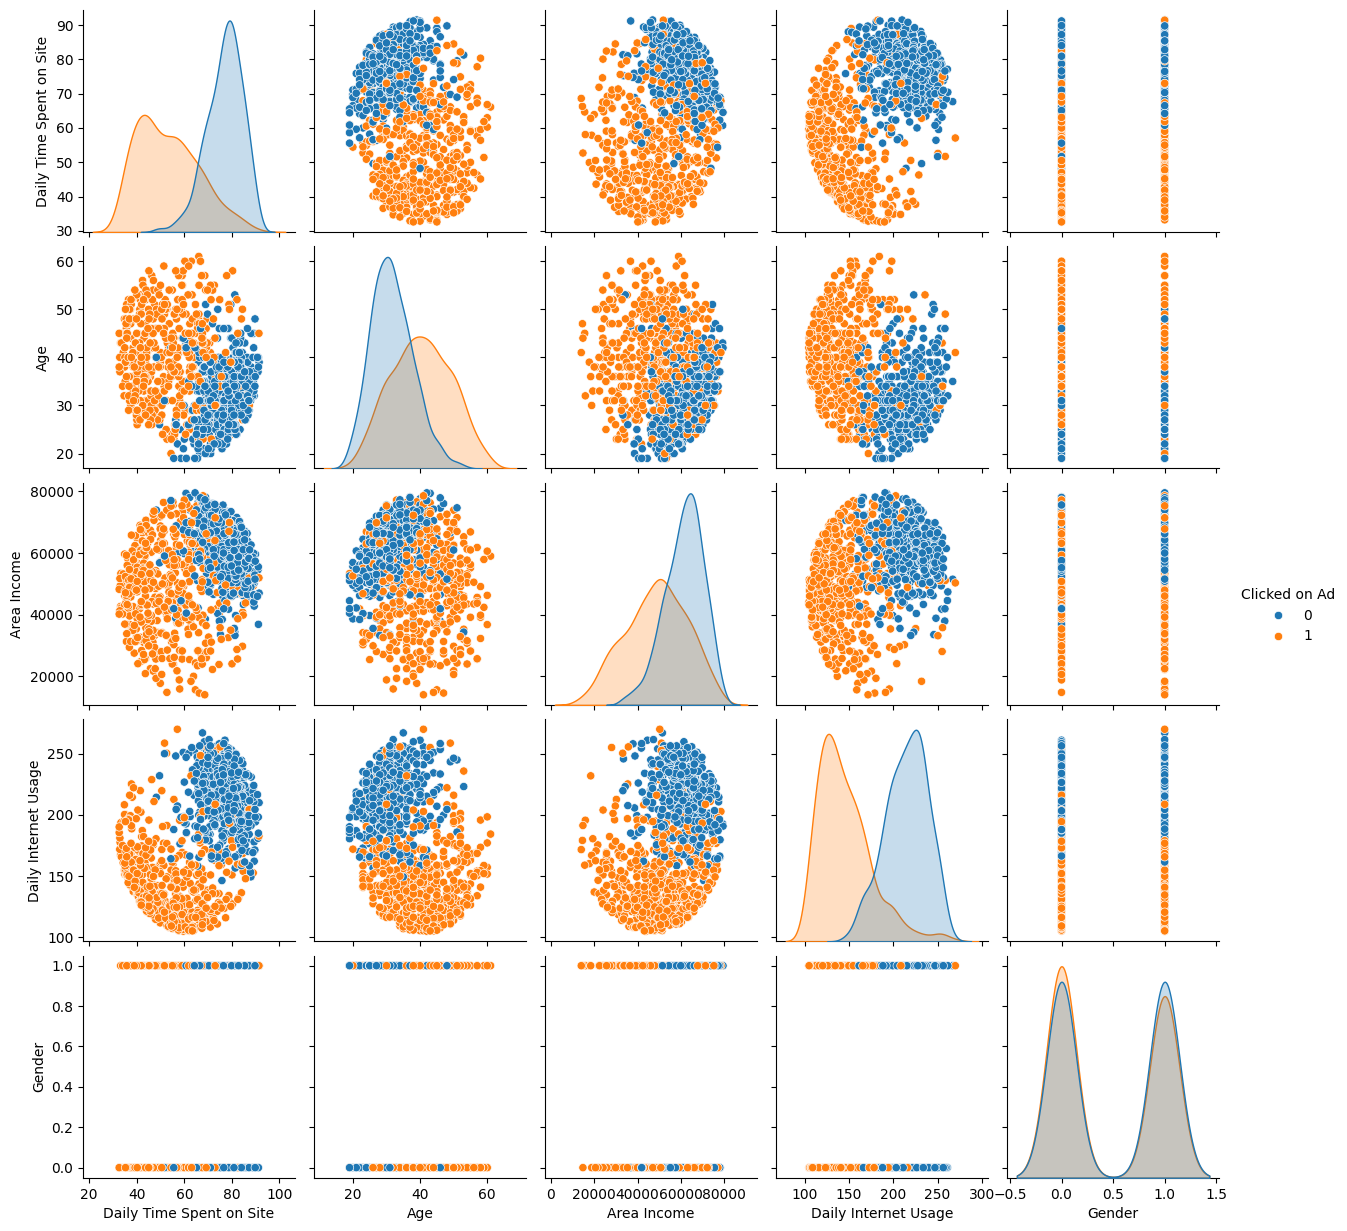

In [ ]:
sns.pairplot(dataframe, hue='Clicked on Ad')

# Data Cleaning

<Axes: >

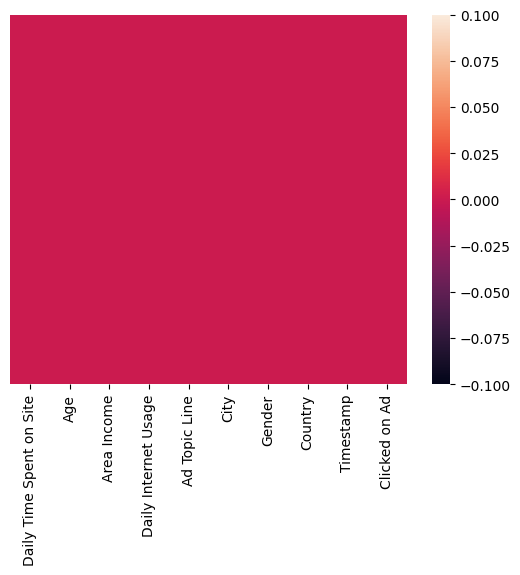

In [ ]:
sns.heatmap(dataframe.isnull(), yticklabels=False)

As we see, we don't have any missing data

Considering the 'Advertisement Topic Line', we decided to drop it. In any case, if we need to extract any form of interesting data from it

As to 'City' and the 'Nation', we can supplant them by dummy variables with numerical features, Nonetheless, along these lines we got such a large number of new highlights.

Another methodology would be thinking about them as a **categorical** features and coding them in one numeric element, conversion into **categorical data type**

The numerical codes corresponding to each unique category in the categorical 'City' column. The codes are assigned based on the order in which the unique values appear in the column.

Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we selected the month and the hour from the timestamp as features

In [ ]:
dataframe['City Codes']= dataframe['City'].astype('category').cat.codes

In [ ]:
dataframe['Country Codes'] = dataframe['Country'].astype('category').cat.codes

In [ ]:
dataframe[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [ ]:
dataframe['Month'] = dataframe['Timestamp'].apply(lambda x: x.split('-')[1])
dataframe['Hour'] = dataframe['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [ ]:
dataframe[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


# Data Model Implementation

Dropping

In [ ]:
X = dataframe.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [ ]:
Y = dataframe['Clicked on Ad']

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= pd.get_dummies(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

**Implementing Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nav_bayes_model = GaussianNB()

In [ ]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

**Implementing Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model = DecisionTreeClassifier()

In [ ]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree_pred = dec_tree_model.predict(X_test)

**Implementing K-Nearest Neighbours Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn_model.predict(X_test)

# **Confusion Matrix** for Finding the incorrect and correct predictions

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cmn = confusion_matrix(Y_test, nav_bayes_pred)

In [ ]:
cmd = confusion_matrix(Y_test, dec_tree_pred)

In [ ]:
cmk = confusion_matrix(Y_test, knn_pred)

 Assuming the class names are binary: 0 (Not Clicked), 1 (Clicked)

In [ ]:
class_names = [0, 1]

# Plot confusion matrix for Navie Bayes

[[140   6]
 [  7 147]]


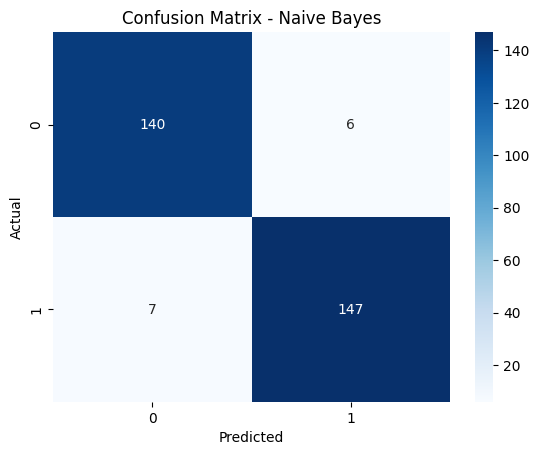

In [ ]:
print(cmn)
sns.heatmap(cmn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Plot confusion matrix for Decision Tree

[[135  11]
 [ 10 144]]


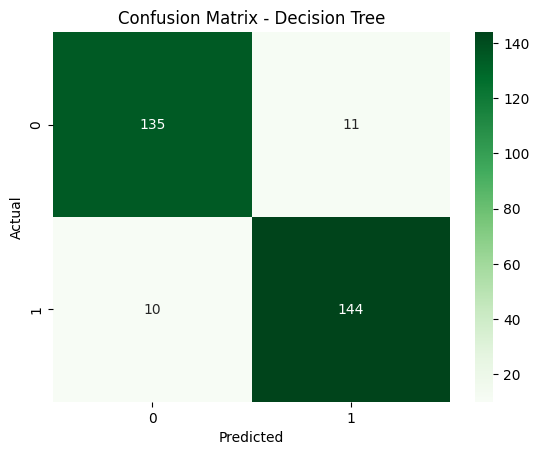

In [ ]:
print(cmd)
sns.heatmap(cmd, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot confusion matrix for KNN

[[109  37]
 [ 59  95]]


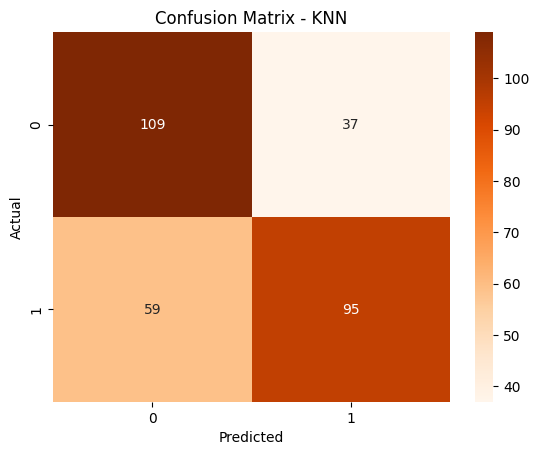

In [ ]:
print(cmk)
sns.heatmap(cmk, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

**Finding accuracy in each model**

In [ ]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [ ]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

95.66666666666667


## Decision Tree

In [ ]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

93.0


## KNN Model

In [ ]:
knn_accuracy = accuracy_score(knn_pred, Y_test)
print(knn_accuracy*100);

68.0


##Compute **ROC curve** and **ROC area** for each model

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score

In [ ]:
nav_bayes_fpr, nav_bayes_tpr, _ = roc_curve(Y_test, nav_bayes_pred)
nav_bayes_auc = roc_auc_score(Y_test, nav_bayes_pred)

dec_tree_fpr, dec_tree_tpr, _ = roc_curve(Y_test, dec_tree_pred)
dec_tree_auc = roc_auc_score(Y_test, dec_tree_pred)

knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_pred)
knn_auc = roc_auc_score(Y_test, knn_pred)


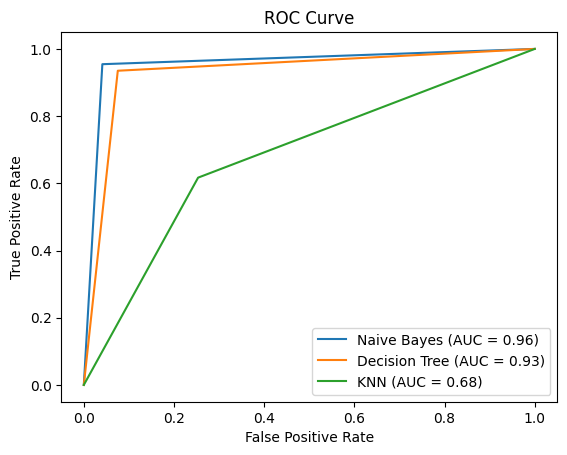

In [ ]:
plt.plot(nav_bayes_fpr, nav_bayes_tpr, label=f'Naive Bayes (AUC = {nav_bayes_auc:.2f})')
plt.plot(dec_tree_fpr, dec_tree_tpr, label=f'Decision Tree (AUC = {dec_tree_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute F1 score for each model

In [ ]:
from sklearn.metrics import f1_score

nav_bayes_pred_labels = (nav_bayes_pred >= 0.5).astype(int)
dec_tree_pred_labels = (dec_tree_pred >= 0.5).astype(int)
knn_pred_labels = (knn_pred >= 0.5).astype(int)


nav_bayes_f1 = f1_score(Y_test, nav_bayes_pred_labels)
dec_tree_f1 = f1_score(Y_test, dec_tree_pred_labels)
knn_f1 = f1_score(Y_test, knn_pred_labels)

print("F1 Score for Naive Bayes:", nav_bayes_f1)
print("F1 Score for Decision Tree:", dec_tree_f1)
print("F1 Score for KNN:", knn_f1)

F1 Score for Naive Bayes: 0.9576547231270358
F1 Score for Decision Tree: 0.9320388349514563
F1 Score for KNN: 0.6643356643356643


### Checking of overfitting of Dataset

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

Extract features and target variable

In [ ]:
x = dataframe.drop('Clicked on Ad', axis=1)
y = dataframe['Clicked on Ad']

In [ ]:
nb_model = GaussianNB()

# Perform cross-validation

In [ ]:
X_encoded = pd.get_dummies(x)
scores = cross_val_score(nb_model, X_encoded, y, cv=5)  # Use 5-fold cross-validation
print("Mean CV Score:", scores.mean())

Mean CV Score: 0.966


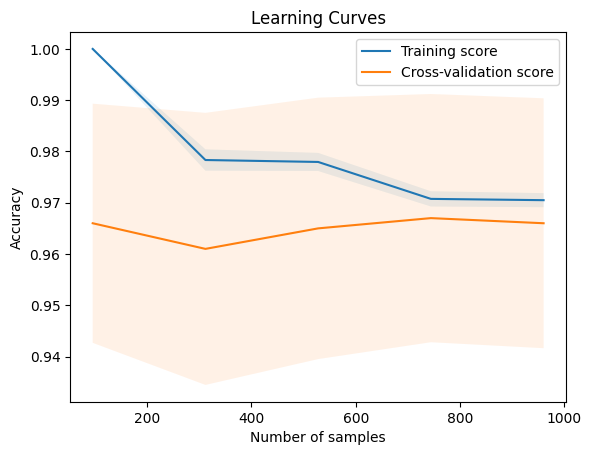

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(nb_model, X_encoded, y, cv=25, train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()



# Conclusion

### After comparing all the above implementation models, we conclude that Naive Bayes Algorithm gives us the maximum accuracy for determining the click  probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it.